In [62]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot as plt
data=pd.read_csv("modified-titanic-passengers.csv")
data.head()

,Unnamed: 0,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,FamilySize
0,0,0,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,13.0000,0,S,Mr,0
1,1,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,7.6500,F G73,S,Mr,0
2,2,0,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,7.8542,0,S,Mr,0
3,3,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,21.0750,0,S,Mrs,4
4,4,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,52.0000,B71,S,Mr,1


In [63]:
data = data.iloc[:200]
len(data)

200

In [64]:
data.replace({"Sex" :{"male":0,"female":1}},inplace=True)


data.isnull().sum()

Unnamed: 0    0
Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Cabin         0
Embarked      0
Title         0
FamilySize    0
dtype: int64

In [65]:

x=data[["Sex","Pclass"]]
y=data["Survived"]

In [66]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.3)
clf= tree.DecisionTreeClassifier()  #Creating a random forest with 100 decision trees
clf.fit(x_train, y_train)  #Training our model
y_pred=clf.predict(x_test)  #testing our model

print("Accuracy:", metrics.accuracy_score(y_test, y_pred)) 

Accuracy: 0.8


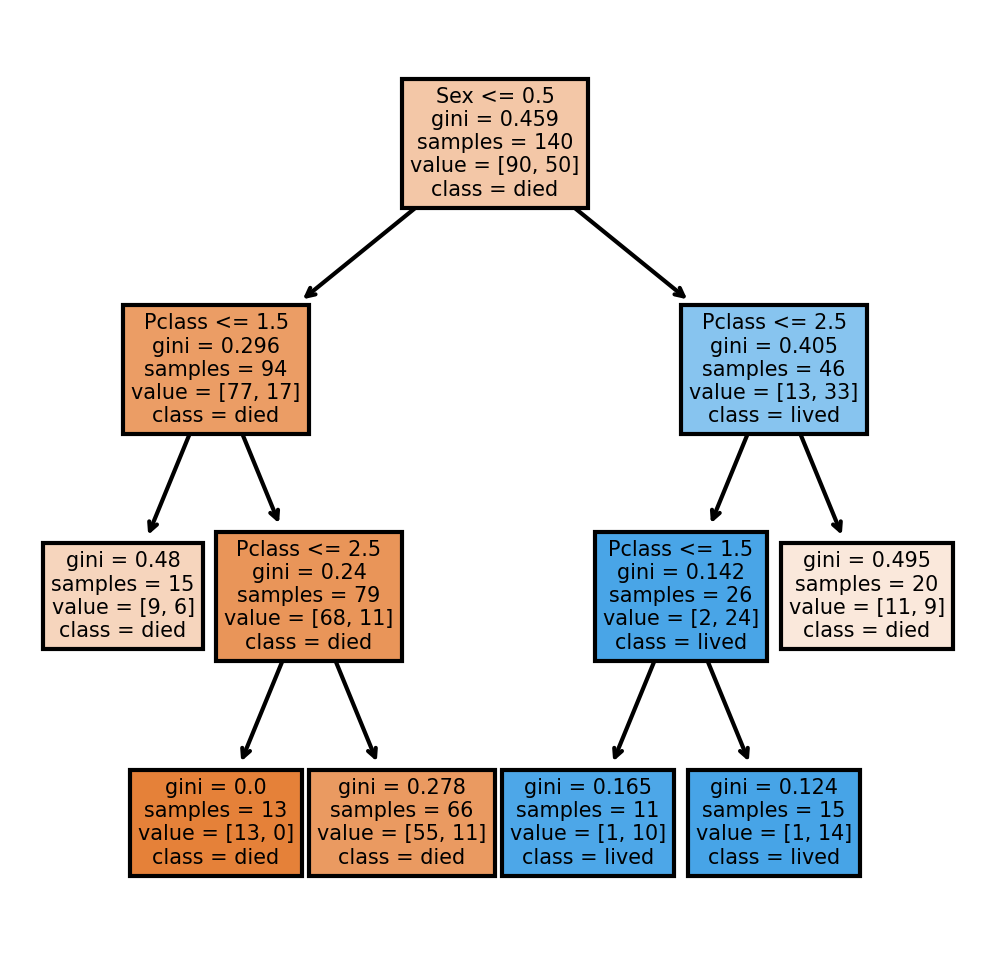

In [67]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)

tree.plot_tree(clf,
           feature_names = ["Sex","Pclass"], 
           class_names=["died","lived"],
           filled = True);
fig.savefig('imageTreePlot.png')
#if it's a male of class <=1.5 meaning class 1 , he most likely died gini=0.495

In [68]:

x=data[["Age","FamilySize"]]
y=data["Survived"]
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.3)
clf= tree.DecisionTreeClassifier()  #Creating a random forest with 100 decision trees
clf.fit(x_train, y_train)  #Training our model
y_pred=clf.predict(x_test)  #testing our model

print("Accuracy:", metrics.accuracy_score(y_test, y_pred)) 

Accuracy: 0.5666666666666667


In [69]:
#the accuracy is lower than when we considered the features Sex and Pclass 

In [70]:
X=data[['FamilySize', 'Age', 'Pclass', 'Sex']] #features
y=data['Survived']  #target
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size=0.3) #splitting data with test size of 30%

In [72]:
clf=RandomForestClassifier(n_estimators=5)  #Creating a random forest with 100 decision trees
clf.fit(x_train, y_train)  #Training our model
y_pred=clf.predict(x_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred)) 

Accuracy: 0.8333333333333334


In [73]:
#the accuracy is higher than both the first and second tree's accuracies

In [75]:
clf=RandomForestClassifier(n_estimators=2)  #Creating a random forest with 100 decision trees
clf.fit(x_train, y_train)  #Training our model
y_pred=clf.predict(x_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred)) 

Accuracy: 0.8666666666666667


In [76]:
# as i lowed the n of estimators the accruracy increased 

In [77]:
#the best accuracy so far was the one with random forest model and a number f estimators of 2 